# **7 Generalized Additive Models**

Reading the data

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.read_csv('penguins_trunc.csv')
data_train, data_test = train_test_split(data, test_size=0.2, random_state=2)

Using GAM (pygam) with only linear terms. Training accuracy ~0.993, test accuracy ~0.986.

In [231]:
import matplotlib.pyplot as plt
from pygam import LogisticGAM, l
import numpy as np
X, y = np.array(data_train.iloc[:, :-1]), np.array(data_train['Species'])
X_test, y_test = np.array(data_test.iloc[:, :-1]), np.array(data_test['Species'])
gam = LogisticGAM(l(0) + l(1) + l(2)).gridsearch(X, y)
titles = ['CulmenLength', 'CulmenDepth', 'FlipperLength']
gam.summary()

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--c:\users\cmex-\appdata\local\programs\python\python39\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in divide
  return dist.levels/(mu*(dist.levels - mu))
c:\users\cmex-\appdata\local\programs\python\python39\lib\site-packages\pygam\pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
c:\users\cmex-\appdata\local\programs\python\python39\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in divide
  return dist.levels/(mu*(dist.levels - mu))
c:\users\cmex-\appdata\local\programs\python\python39\lib\site-packages\pygam\pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
c:\users\cmex-\appdata\local\programs\python\python39\lib\site-packages\pygam\links.py:149: RuntimeWarn

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.8847
Link Function:                        LogitLink Log Likelihood:                                    -6.2814
Number of Samples:                          273 AIC:                                               20.3323
                                                AICc:                                              20.5475
                                                UBRE:                                               2.0859
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.9665
Feature Function                  Lam

0.9926739926739927
0.9855072463768116


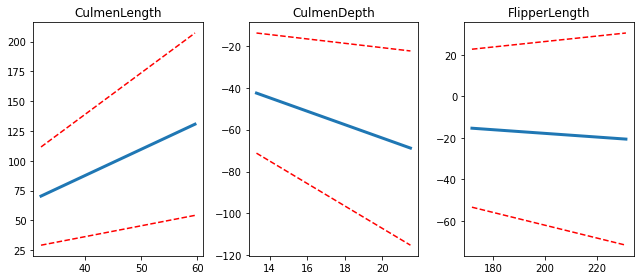

In [232]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(9, 4)
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=.95)
    ax.plot(XX[:, i], pdep, lw=3)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i])
    plt.tight_layout()

print(gam.accuracy(X, y))
print(gam.accuracy(X_test, y_test))

Using GAM with splines as basic functions (15 for each feature). As a result, functions are
linear and the training accuracy ~0.993,  test accuracy ~0.986 (same as for
just linear classifiers).

In [160]:
from pygam import s
gam = LogisticGAM(s(0, n_splines=15, spline_order=7) + s(1, n_splines=15)
                  + s(2, n_splines=15)).gridsearch(X, y)

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--c:\users\cmex-\appdata\local\programs\python\python39\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in divide
  return dist.levels/(mu*(dist.levels - mu))
c:\users\cmex-\appdata\local\programs\python\python39\lib\site-packages\pygam\pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00c:\users\cmex-\appdata\local\programs\python\python39\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in divide
  return dist.levels/(mu*(dist.levels - mu))
c:\users\cmex-\appdata\local\programs\python\python39\lib\site-packages\pygam\pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
c:\users\cmex-\appdata\l

0.9855072463768116
0.9926739926739927


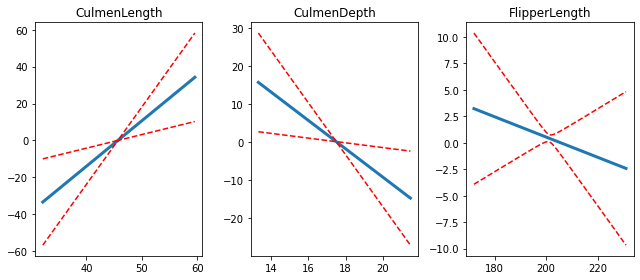

In [161]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(9, 4)
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=.95)

    ax.plot(XX[:, i], pdep, lw=3)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i])
    plt.tight_layout()
print(gam.accuracy(X_test, y_test))
print(gam.accuracy(X, y))

Using GAM with factor terms as basic functions. I have to rescale the data since otherwise I have
an error when I try to get the final functions for each feature (there is the same problem on git).

I played with parameters in f (lam=0.6, penalties='auto'), but I didn't get the good result.
data is always overfitted. The best accuracy I could get: training accuracy ~100%, test
accuracy ~93%.

Maybe it's related to the scaling I used.

In [247]:
from pygam import f
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0,1))
X_norm = min_max_scaler.fit_transform(X)
X_test_norm = min_max_scaler.fit_transform(X_test)
gam = LogisticGAM(f(0, lam=0.6, penalties='derivative') + f(1, penalties='derivative')
                  + f(2, penalties='derivative')).fit(X_norm, y)
gam2 = LogisticGAM(f(0, lam=1, penalties='auto') + f(1, lam=1, penalties='auto')
                  + f(2,lam=1, penalties='auto')).gridsearch(X_norm, y)

100% (11 of 11) |########################| Elapsed Time: 0:00:05 Time:  0:00:05


did not converge


1.0
0.927536231884058
1.0
0.855072463768116


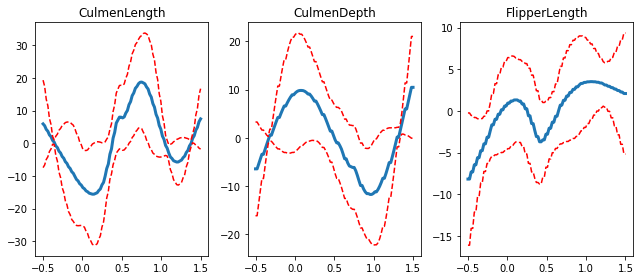

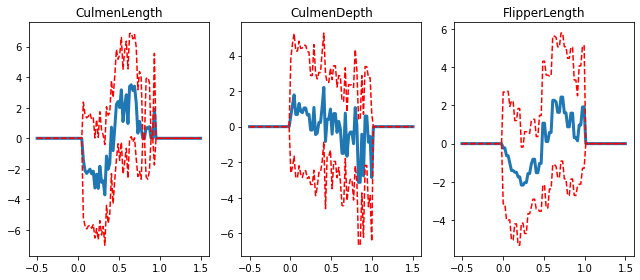

In [248]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(9, 4)
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=.95)

    ax.plot(XX[:, i], pdep, lw=3)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i])
    plt.tight_layout()
print(gam.accuracy(X_norm, y))
print(gam.accuracy(X_test_norm, y_test))
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(9, 4)
for i, ax in enumerate(axs):
    XX = gam2.generate_X_grid(term=i)
    pdep, confi = gam2.partial_dependence(term=i, width=.95)

    ax.plot(XX[:, i], pdep, lw=3)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i])
    plt.tight_layout()
print(gam2.accuracy(X_norm, y))
print(gam2.accuracy(X_test_norm, y_test))

if I use fit instead of gridsearch for splits, it works worse. Training accuracy ~, test
accuracy ~99%, ~97%.

In [1]:
from pygam import s
gam = LogisticGAM(s(0, n_splines=15) + s(1, n_splines=15)
                  + s(2, n_splines=15)).fit(X, y)
# gam.summary()

NameError: name 'LogisticGAM' is not defined

0.9710144927536232
0.989010989010989


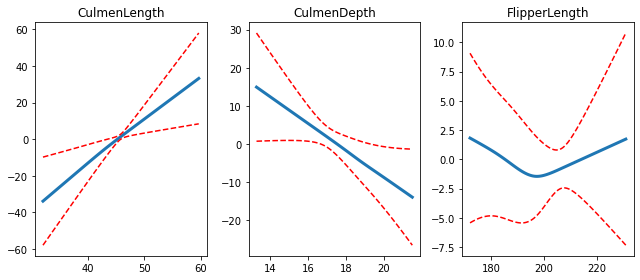

In [246]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(9, 4)
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=.95)

    ax.plot(XX[:, i], pdep, lw=3)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i])
    plt.tight_layout()
print(gam.accuracy(X_test, y_test))
print(gam.accuracy(X, y))